In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. Classify IRIS flower dataset
print("--- IRIS Flower Dataset Classification ---")
iris_df = pd.read_csv("/content/iris (3).csv")
X_iris = iris_df.drop("species", axis=1)
y_iris = iris_df["species"]
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# SVM with RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_iris_train, y_iris_train)
y_iris_pred_rbf = svm_rbf.predict(X_iris_test)
accuracy_rbf = accuracy_score(y_iris_test, y_iris_pred_rbf)
cm_rbf = confusion_matrix(y_iris_test, y_iris_pred_rbf)

print("SVM with RBF Kernel:")
print(f"Accuracy: {accuracy_rbf:.4f}")
print("Confusion Matrix:\n", cm_rbf)

# SVM with Linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_iris_train, y_iris_train)
y_iris_pred_linear = svm_linear.predict(X_iris_test)
accuracy_linear = accuracy_score(y_iris_test, y_iris_pred_linear)
cm_linear = confusion_matrix(y_iris_test, y_iris_pred_linear)

print("\nSVM with Linear Kernel:")
print(f"Accuracy: {accuracy_linear:.4f}")
print("Confusion Matrix:\n", cm_linear)

--- IRIS Flower Dataset Classification ---
SVM with RBF Kernel:
Accuracy: 1.0000
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

SVM with Linear Kernel:
Accuracy: 1.0000
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


--- Letter-recognition Dataset Classification ---
Accuracy: 0.9305
Confusion Matrix:
 [[144   0   1   0   0   0   1   0   0   0   1   0   1   0   0   0   0   0
    0   0   1   0   0   0   0   0]
 [  0 143   0   5   0   1   0   0   0   0   0   0   0   0   0   0   0   4
    0   0   0   0   0   0   0   0]
 [  0   0 123   0   2   0   3   1   0   0   1   0   0   0   4   0   0   2
    0   0   1   0   0   0   0   0]
 [  0   1   0 153   0   0   0   2   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   3   1   0 130   0   5   0   0   0   0   0   0   0   0   0   1   0
    0   0   0   0   0   0   0   1]
 [  0   2   0   0   1 134   0   0   1   0   0   0   0   0   0   0   0   0
    1   1   0   0   0   0   0   0]
 [  1   0   1   4   0   0 149   0   0   0   2   0   0   0   0   0   0   2
    0   0   0   1   0   0   0   0]
 [  0   4   0   8   0   0   0 106   0   0   5   0   0   1   2   1   1  13
    0   0   2   0   0   0   1   0]
 [  0   0   0   1   0   2   0   0 134   7 

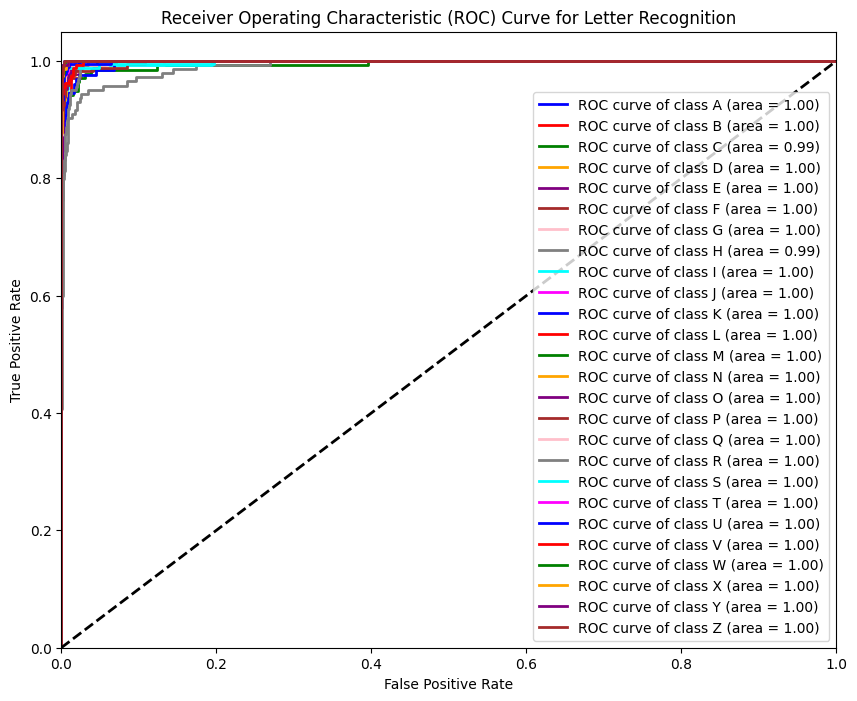


AUC Score (One-vs-Rest):
Class A: 0.9999
Class B: 0.9986
Class C: 0.9948
Class D: 0.9991
Class E: 0.9989
Class F: 0.9983
Class G: 0.9977
Class H: 0.9915
Class I: 0.9979
Class J: 0.9996
Class K: 0.9974
Class L: 0.9992
Class M: 0.9996
Class N: 0.9993
Class O: 0.9989
Class P: 0.9981
Class Q: 0.9994
Class R: 0.9971
Class S: 0.9984
Class T: 0.9997
Class U: 0.9993
Class V: 0.9993
Class W: 0.9999
Class X: 0.9996
Class Y: 0.9999
Class Z: 0.9998


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, label_binarize
from itertools import cycle

# Load the Letter-recognition dataset
letter_df = pd.read_csv("/content/letter-recognition.csv")
X_letter = letter_df.drop("letter", axis=1)
y_letter = letter_df["letter"]

# Split the data into training and testing sets (80% train, 20% test)
X_letter_train, X_letter_test, y_letter_train, y_letter_test = train_test_split(X_letter, y_letter, test_size=0.2, random_state=42)

# Train an SVM classifier (using RBF kernel, a common effective choice)
svm_letter = SVC(probability=True, random_state=42) # probability=True for ROC curve
svm_letter.fit(X_letter_train, y_letter_train)

# Make predictions on the test data
y_letter_pred = svm_letter.predict(X_letter_test)
y_letter_proba = svm_letter.predict_proba(X_letter_test)

# Evaluate the model
accuracy_letter = accuracy_score(y_letter_test, y_letter_pred)
cm_letter = confusion_matrix(y_letter_test, y_letter_pred)
print("--- Letter-recognition Dataset Classification ---")
print(f"Accuracy: {accuracy_letter:.4f}")
print("Confusion Matrix:\n", cm_letter)

# Label encode the target variable for ROC curve
label_encoder = LabelEncoder()
y_letter_encoded = label_encoder.fit_transform(y_letter_test)
n_classes = len(label_encoder.classes_)
y_bin = label_binarize(y_letter_encoded, classes=range(n_classes))

# Plot ROC curve for each class (one-vs-rest)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_letter_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {label_encoder.classes_[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Letter Recognition')
plt.legend(loc="lower right")
plt.show()

# Display AUC score (One-vs-Rest)
print("\nAUC Score (One-vs-Rest):")
for i in range(n_classes):
    print(f"Class {label_encoder.classes_[i]}: {roc_auc[i]:.4f}")